In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import datetime
plt.rcParams['figure.figsize'] = 9, 7
plt.rcParams['axes.grid'] = True

In [3]:
customers = pd.read_csv('Data/customers.txt',delimiter=';',header='infer')
complaints= pd.read_csv('Data/complaints.txt',delimiter=';',header='infer')
credits= pd.read_csv('Data/credit.txt',delimiter=';',header='infer')
delivery= pd.read_csv('Data/delivery.txt',delimiter=';',header='infer')
formula= pd.read_csv('Data/formula.txt',delimiter=';',header='infer')
# subscriptions= pd.read_csv('Data/subscriptions.txt',delimiter='\t',header='infer')

In [4]:
subscription = pd.read_excel('Data/Subscription_new.xlsx')

In [5]:
subscription.head()

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,...,FormulaID,NewFormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
0.0,1000024.0,1150045.0,8.0,1111110.0,18/01/2010,17/04/2010,76.0,25,17/03/2010,BT,...,8552,8552,79,79,1.039.474,0,0,0,79,0
1.0,1000082.0,1150046.0,8.0,1111110.0,14/01/2010,12/03/2010,50.0,25,3/03/2010,BT,...,10017,10017,519.737,29.6,0.592,0,223.737,223.737,29.6,0
2.0,100012.0,89085.0,8.0,1111110.0,1/01/2008,30/12/2008,304.0,10,21/11/2008,BT,...,875,875,249,249,0.811842,0,0,0,246.8,-2.2
3.0,100013.0,89085.0,8.0,1111110.0,2/01/2007,31/12/2007,304.0,25,1/12/2007,BT,...,874,874,235,235,0.773026,0,0,0,235,0
4.0,100016.0,89087.0,8.0,1111110.0,1/01/2008,30/12/2008,304.0,10,21/11/2008,BT,...,875,875,249,249,0.811842,0,0,0,246.8,-2.2


In [6]:
customers.head()

,CustomerID,Gender,DOB,District,ZIP,StreeID
0,908289,F,24/01/1957,5,3660,42555
1,55837,M,31/01/1948,1,2620,24910
2,493436,M,11/07/1977,5,3570,39586
3,913684,F,01/01/1900,5,3500,37484
4,36632,M,18/08/1952,5,3910,46296


In [7]:
subscription.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15472 entries, 0.0 to nan
Data columns (total 25 columns):
SubscriptionID       15459 non-null float64
CustomerID           15459 non-null float64
ProductID            15459 non-null float64
Pattern              15459 non-null float64
StartDate            15459 non-null object
EndDate              15459 non-null object
NbrNewspapers        15459 non-null float64
NbrStart             15459 non-null object
RenewalDate          10595 non-null object
PaymentType          10595 non-null object
NewPaymentTYpe       15459 non-null object
PaymentStatus        15459 non-null object
NewPaymentStatus     15459 non-null object
PaymentDate          15320 non-null object
NewPaymentDate       15138 non-null object
FormulaID            15138 non-null object
NewFormulaID         15472 non-null object
GrossFormulaPrice    15138 non-null object
NetFormulaPrice      15138 non-null object
NetNewspaperPrice    15138 non-null object
ProductDiscount      151

##### Making Base Table

In [8]:
subscription.columns

Index([u'SubscriptionID', u'CustomerID', u'ProductID', u'Pattern',
       u'StartDate', u'EndDate', u'NbrNewspapers', u'NbrStart', u'RenewalDate',
       u'PaymentType', u'NewPaymentTYpe', u'PaymentStatus',
       u'NewPaymentStatus', u'PaymentDate', u'NewPaymentDate', u'FormulaID',
       u'NewFormulaID', u'GrossFormulaPrice', u'NetFormulaPrice',
       u'NetNewspaperPrice', u'ProductDiscount', u'FormulaDiscount',
       u'TotalDiscount', u'TotalPrice', u'TotalCredit'],
      dtype='object')

In [9]:
customers.columns

Index([u'CustomerID', u'Gender', u'DOB', u'District', u'ZIP', u'StreeID'], dtype='object')

In [10]:
delivery.columns

Index([u'SubscriptionID', u'DeliveryType', u'DeliveryClass',
       u'DeliveryContext', u'StartDate', u'EndDate'],
      dtype='object')

In [11]:
complaints.columns

Index([u'ComplaintID', u'CustomerID', u'ProductID', u'ComplaintDate',
       u'ComplaintType', u'SolutionType', u'FeedbackType'],
      dtype='object')

In [12]:
sub_cust_df = pd.merge(subscription,customers,on = 'CustomerID',how = 'left')

In [13]:
sub_cust_com_df = pd.merge(sub_cust_df,complaints,on = 'CustomerID',how = 'left')

In [14]:
sub_cust_com_del_df = pd.merge(sub_cust_com_df,delivery,on = 'SubscriptionID',how = 'left')

In [15]:
base_table = sub_cust_com_del_df

In [22]:
base_table.columns

Index([   u'SubscriptionID',        u'CustomerID',       u'ProductID_x',
                 u'Pattern',       u'StartDate_x',         u'EndDate_x',
           u'NbrNewspapers',          u'NbrStart',       u'RenewalDate',
             u'PaymentType',    u'NewPaymentTYpe',     u'PaymentStatus',
        u'NewPaymentStatus',       u'PaymentDate',    u'NewPaymentDate',
               u'FormulaID',      u'NewFormulaID', u'GrossFormulaPrice',
         u'NetFormulaPrice', u'NetNewspaperPrice',   u'ProductDiscount',
         u'FormulaDiscount',     u'TotalDiscount',        u'TotalPrice',
             u'TotalCredit',            u'Gender',               u'DOB',
                u'District',               u'ZIP',           u'StreeID',
             u'ComplaintID',       u'ProductID_y',     u'ComplaintDate',
           u'ComplaintType',      u'SolutionType',      u'FeedbackType',
            u'DeliveryType',     u'DeliveryClass',   u'DeliveryContext',
             u'StartDate_y',         u'EndDate_y'],

In [36]:
base_table.rename(columns = {'StartDate_x' : 'StartDate_Sub',
                            'EndDate_x' : 'EndDate_Sub',
                            'StartDate_y' : 'StartDate_Dlvry',
                            'EndDate_y' : 'EndDate_Dlvry'},inplace = True)

In [84]:
base_table.rename(columns = {'ProductID_y' : 'ComplaintProductID'},inplace=True)

In [85]:
base_table.columns

Index([    u'SubscriptionID',         u'CustomerID',        u'ProductID_x',
                  u'Pattern',      u'StartDate_Sub',        u'EndDate_Sub',
            u'NbrNewspapers',           u'NbrStart',        u'RenewalDate',
              u'PaymentType',     u'NewPaymentTYpe',      u'PaymentStatus',
         u'NewPaymentStatus',        u'PaymentDate',     u'NewPaymentDate',
                u'FormulaID',       u'NewFormulaID',  u'GrossFormulaPrice',
          u'NetFormulaPrice',  u'NetNewspaperPrice',    u'ProductDiscount',
          u'FormulaDiscount',      u'TotalDiscount',         u'TotalPrice',
              u'TotalCredit',             u'Gender',                u'DOB',
                 u'District',                u'ZIP',            u'StreeID',
              u'ComplaintID', u'ComplaintProductID',      u'ComplaintDate',
            u'ComplaintType',       u'SolutionType',       u'FeedbackType',
             u'DeliveryType',      u'DeliveryClass',    u'DeliveryContext',
          u'

In [86]:
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81401 entries, 0 to 81400
Data columns (total 43 columns):
SubscriptionID        81388 non-null object
CustomerID            81388 non-null object
ProductID_x           81388 non-null float64
Pattern               81388 non-null float64
StartDate_Sub         81388 non-null datetime64[ns]
EndDate_Sub           81388 non-null datetime64[ns]
NbrNewspapers         81388 non-null float64
NbrStart              81388 non-null object
RenewalDate           60229 non-null object
PaymentType           60229 non-null object
NewPaymentTYpe        81388 non-null object
PaymentStatus         81388 non-null object
NewPaymentStatus      81388 non-null object
PaymentDate           81011 non-null object
NewPaymentDate        80479 non-null object
FormulaID             80479 non-null object
NewFormulaID          81401 non-null object
GrossFormulaPrice     80479 non-null object
NetFormulaPrice       80479 non-null object
NetNewspaperPrice     80479 non-null

#### Converting to dates to datetime

In [14]:
base_table.StartDate_Sub = pd.to_datetime(base_table.StartDate_Sub)
base_table.EndDate_Sub = pd.to_datetime(base_table.EndDate_Sub)
base_table.StartDate_Dlvry = pd.to_datetime(base_table.StartDate_Dlvry)
base_table.EndDate_Dlvry = pd.to_datetime(base_table.EndDate_Dlvry)
base_table.NewPaymentDate = pd.to_datetime(base_table.NewPayentDate)
base_table.RenewalDate = pd.to_datetime(base_table.RenewalDate)

C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [87]:
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81401 entries, 0 to 81400
Data columns (total 43 columns):
SubscriptionID        81388 non-null object
CustomerID            81388 non-null object
ProductID_x           81388 non-null float64
Pattern               81388 non-null float64
StartDate_Sub         81388 non-null datetime64[ns]
EndDate_Sub           81388 non-null datetime64[ns]
NbrNewspapers         81388 non-null float64
NbrStart              81388 non-null object
RenewalDate           60229 non-null object
PaymentType           60229 non-null object
NewPaymentTYpe        81388 non-null object
PaymentStatus         81388 non-null object
NewPaymentStatus      81388 non-null object
PaymentDate           81011 non-null object
NewPaymentDate        80479 non-null object
FormulaID             80479 non-null object
NewFormulaID          81401 non-null object
GrossFormulaPrice     80479 non-null object
NetFormulaPrice       80479 non-null object
NetNewspaperPrice     80479 non-null

In [41]:
base_table['Duration'] = pd.to_timedelta(base_table.EndDate_Dlvry - base_table.StartDate_Sub)

## Insights about the Customers

#### Plotting Duration of Customer over Years

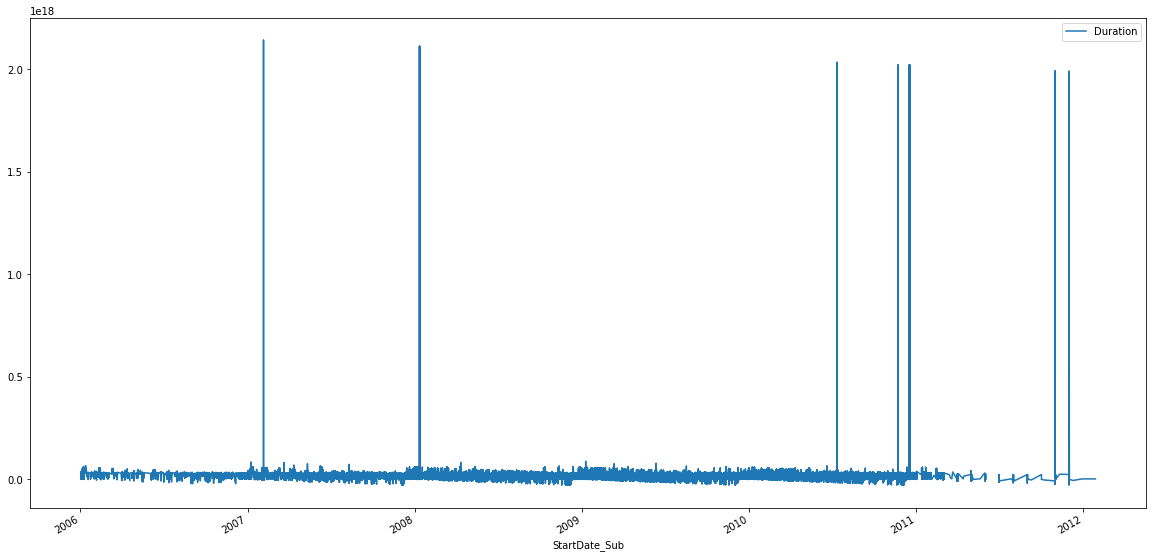

In [43]:
base_table.plot(x = 'StartDate_Sub' ,y='Duration',figsize=(10*2,5*2))

##### Average Duration of Subscription  = `196 days` or `6.5 months`

In [44]:
base_table['Duration'].mean()

Timedelta('196 days 01:52:54.660138')

- ##### Info About Oldest Existing Customer - <br>Customer ID = 44965 <br>Product Id = 8 <br>Pattern = 1111110 <br>Start Date = 2007-02-05 <i>

In [45]:
base_table['Duration'].max()
base_table[base_table['Duration']==base_table['Duration'].max()]

,SubscriptionID,CustomerID,ProductID_x,Pattern,StartDate_Sub,EndDate_Sub,NbrNewspapers,NbrStart,RenewalDate,PaymentType,...,ComplaintDate,ComplaintType,SolutionType,FeedbackType,DeliveryType,DeliveryClass,DeliveryContext,StartDate_Dlvry,EndDate_Dlvry,Duration
57419,67540,44965,8.0,1111110.0,2007-02-05,2075-01-01,153.0,25,8/10/2007,BT,...,NaN,NaN,NaN,NaN,DI,NaN,NaN,2007-10-20,2075-01-01,24802 days


##### Mostly Used Payment Type = `BT(Bank Transfer)`

In [48]:
base_table['NewPaymentTYpe'].mode()

0    BT
dtype: object

##### Most Common Pattern Among Customers = 1111110

In [49]:
base_table['Pattern'].mode()

0    1111110.0
dtype: float64

In [50]:
base_table['Year'] = base_table['StartDate_Sub'].dt.year

In [121]:
base_table.columns

Index([    u'SubscriptionID',         u'CustomerID',        u'ProductID_x',
                  u'Pattern',      u'StartDate_Sub',        u'EndDate_Sub',
            u'NbrNewspapers',           u'NbrStart',        u'RenewalDate',
              u'PaymentType',     u'NewPaymentTYpe',      u'PaymentStatus',
         u'NewPaymentStatus',        u'PaymentDate',     u'NewPaymentDate',
                u'FormulaID',       u'NewFormulaID',  u'GrossFormulaPrice',
          u'NetFormulaPrice',  u'NetNewspaperPrice',    u'ProductDiscount',
          u'FormulaDiscount',      u'TotalDiscount',         u'TotalPrice',
              u'TotalCredit',             u'Gender',                u'DOB',
                 u'District',                u'ZIP',            u'StreeID',
              u'ComplaintID', u'ComplaintProductID',      u'ComplaintDate',
            u'ComplaintType',       u'SolutionType',       u'FeedbackType',
             u'DeliveryType',      u'DeliveryClass',    u'DeliveryContext',
          u'

In [ ]:
base_table.to_excel('BaseTable_For_Publishing_Company.xlsx')

##### Complaints of Various Products over the years

In [3]:
complaints_by_year = base_table[['Year','ComplaintProductID']].groupby('Year').ComplaintProductID.value_counts().reset_index(name = 'Counts')

In [4]:
complaints_by_year

,Year,ComplaintProductID,Counts
0,2006,4.0,1855
1,2006,8.0,1587
2,2006,7.0,529
3,2006,5.0,467
4,2006,2.0,441
5,2006,6.0,361
6,2006,1.0,247
7,2006,3.0,226
8,2007,8.0,3711
9,2007,4.0,3516


In [5]:
complaints_by_year = complaints_by_year.pivot_table(index='Year',columns=['ComplaintProductID'],values=['Counts'])

In [6]:
complaints_by_year

Counts                                                 \
ComplaintProductID    1.0     2.0     3.0     4.0     5.0    6.0     7.0   
Year                                                                       
2006                247.0   441.0   226.0  1855.0   467.0  361.0   529.0   
2007                592.0  1003.0   551.0  3516.0   755.0  607.0  1222.0   
2008                601.0  1336.0   882.0  4182.0  1053.0  814.0  1210.0   
2009                623.0  1628.0  1074.0  3719.0   811.0  894.0  1411.0   
2010                450.0  1242.0   543.0  2389.0   780.0  581.0  1152.0   
2011                 59.0   141.0    94.0   319.0    81.0   60.0   107.0   
2012                  NaN     NaN     NaN     NaN     NaN    NaN     NaN   

                            
ComplaintProductID     8.0  
Year                        
2006                1587.0  
2007                3711.0  
2008                5399.0  
2009                5355.0  
2010                4899.0  
2011                 774.0  
2012                   1.0

In [123]:
complaints_by_year.to_excel('Number of Complaints of each Product each Year.xlsx')

In [179]:
products = complaints_by_year.index.get_level_values(0).unique()

### Plotting Complaints of Each Product Each Year <br> 
<i> Product 4 and Product 8 have the most Complaints all years

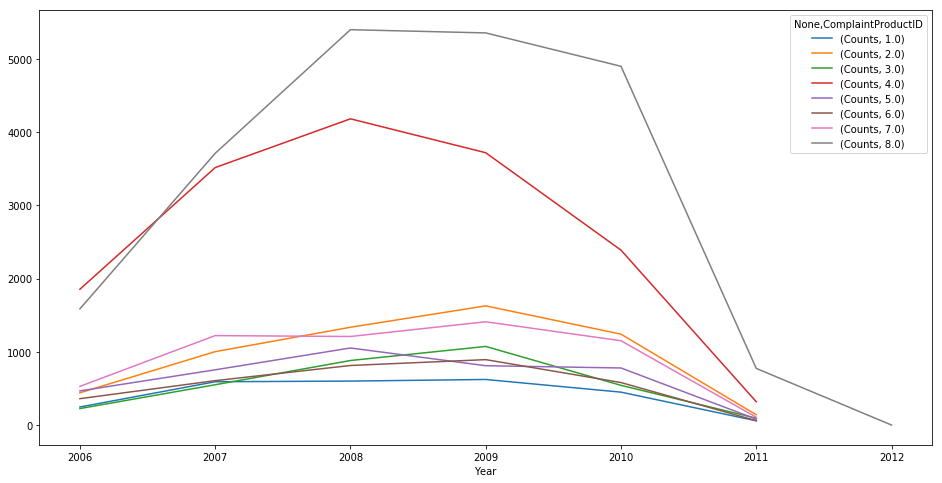

In [190]:
plot = complaints_by_year.plot(complaints_by_year.index,figsize=(8*2,4*2))
Complaints_plot = pl.set_ylabel('Counts')

#### Heatmap of Number of Complaints

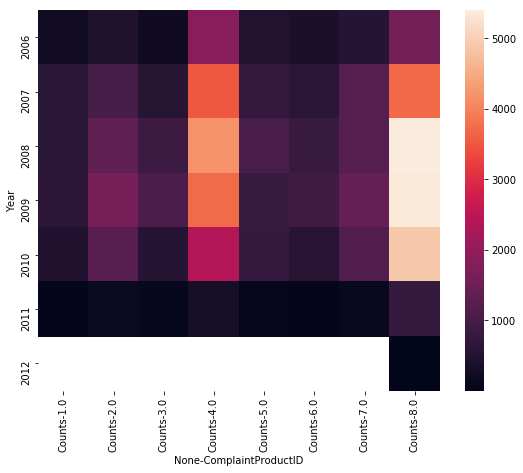

In [10]:
sns.heatmap(complaints_by_year)

In [17]:
base_table.columns

Index([u'SubscriptionID', u'CustomerID', u'ProductID_x', u'Pattern',
       u'StartDate_Sub', u'EndDate_Sub', u'NbrNewspapers', u'NbrStart',
       u'RenewalDate', u'IsRenewed', u'PaymentType', u'NewPaymentTYpe',
       u'PaymentStatus', u'NewPaymentStatus', u'PaymentDate', u'NewPayentDate',
       u'FormulaID', u'NewFormulaID', u'GrossFormulaPrice', u'NetFormulaPrice',
       u'NetNewspaperPrice', u'ProductDiscount', u'FormulaDiscount',
       u'TotalDiscount', u'TotalPrice', u'TotalCredit', u'Gender', u'DOB',
       u'District', u'ZIP', u'StreeID', u'ComplaintID', u'ComplaintProductID',
       u'ComplaintDate', u'ComplaintType', u'SolutionType', u'FeedbackType',
       u'DeliveryType', u'DeliveryClass', u'DeliveryContext',
       u'StartDate_Dlvry', u'EndDate_Dlvry', u'Duration', u'Year'],
      dtype='object')

In [25]:
base_table_renew = base_table[base_table.IsRenewed==1]
base_table_notrenew = base_table[base_table.IsRenewed==0]

In [27]:
len(base_table_renew)

60229

In [28]:
len(base_table_notrenew)

21159

In [30]:
renew_count = base_table_renew[['SubscriptionID','District']].groupby(['District']).count()
renew_count.reset_index(inplace=True)
renew_count.rename(columns = {'SubscriptionID' : 'renew_count',},inplace=True)

In [33]:
notrenew = base_table_notrenew[['SubscriptionID','District']].groupby(['District']).count()
notrenew.reset_index(inplace = True)
notrenew.rename(columns = {'SubscriptionID' : 'NotRenew_count'},inplace=True)

In [39]:
Accounts_count = pd.DataFrame(columns=['DisctricID','RenewedAccounts','NotRenewedAccount'])

In [41]:
Accounts_count.DisctricID = renew_count.District
Accounts_count.RenewedAccounts = renew_count.renew_count
Accounts_count.NotRenewedAccount = notrenew.NotRenew_count

### Renewed Account And Not Renewed Account in Various Districts

In [42]:
Accounts_count

,DisctricID,RenewedAccounts,NotRenewedAccount
0,1,35412,12617
1,2,2437,720
2,3,48,48
3,4,1194,351
4,5,18680,6424
5,6,30,16
6,7,2278,875
7,8,150,108


In [43]:
Accounts_count.to_excel('AccountsCount.xlsx')

In [11]:
numeric_var_names=[key for key in dict(base_table.dtypes) if dict(base_table.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(base_table.dtypes) if dict(base_table.dtypes)[key] in ['object']]
print numeric_var_names
print cat_var_names

[u'ProductID_x', u'District', u'Pattern', u'ComplaintProductID', u'TotalCredit', u'GrossFormulaPrice', u'NetFormulaPrice', u'IsRenewed', u'SolutionType', u'NetNewspaperPrice', u'TotalDiscount', u'StreeID', u'TotalPrice', u'CustomerID', u'ZIP', u'Year', u'ComplaintType', u'FormulaDiscount', u'ComplaintID', u'SubscriptionID', u'Duration', u'FeedbackType', u'NbrNewspapers']
[u'DOB', u'PaymentStatus', u'ComplaintDate', u'DeliveryContext', u'NewPaymentStatus', u'NbrStart', u'FormulaID', u'RenewalDate', u'Gender', u'NewFormulaID', u'PaymentDate', u'NewPayentDate', u'DeliveryType', u'PaymentType', u'NewPaymentTYpe', u'ProductDiscount', u'DeliveryClass']


### Box Plot of Total View

In [38]:
notrenew

,District,NotRenew_count
0,1,12617
1,2,720
2,3,48
3,4,351
4,5,6424
5,6,16
6,7,875
7,8,108


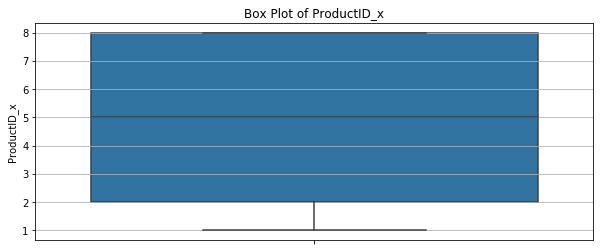

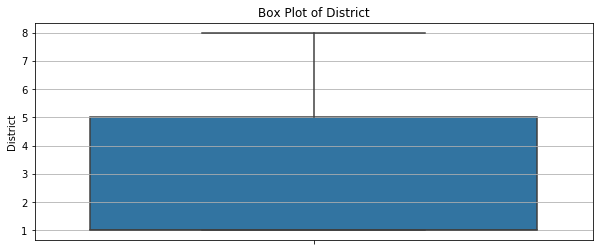

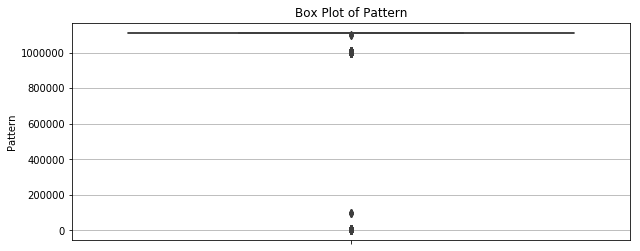

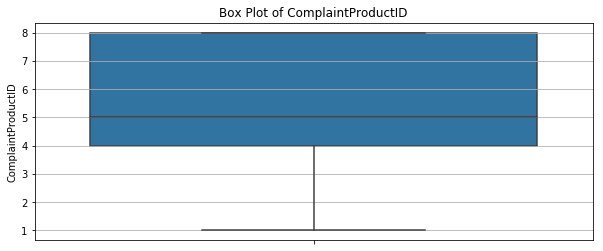

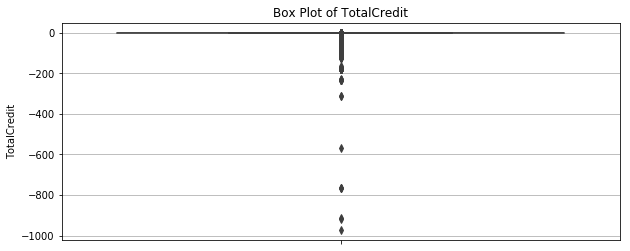

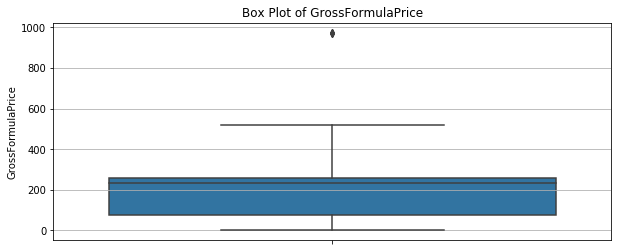

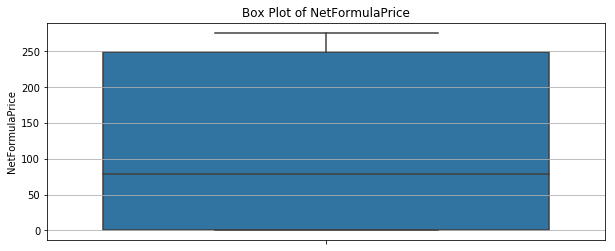

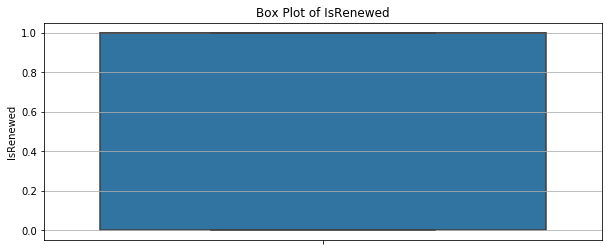

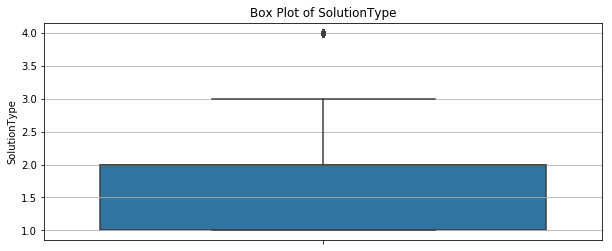

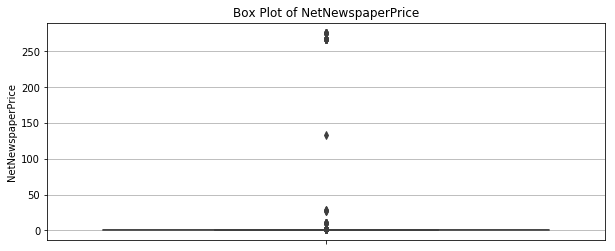

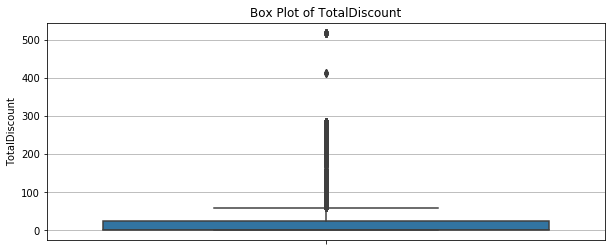

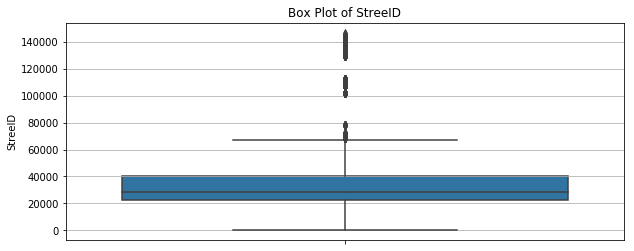

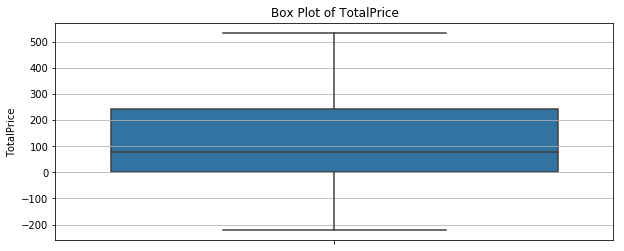

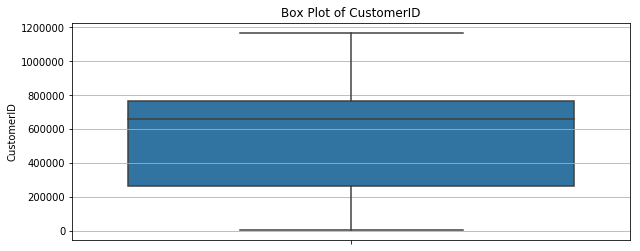

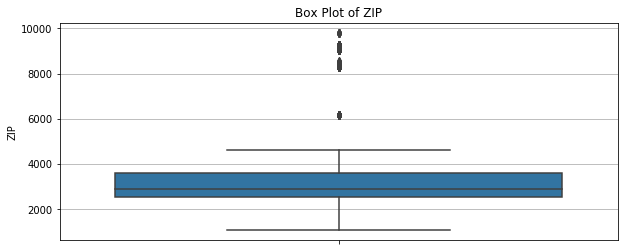

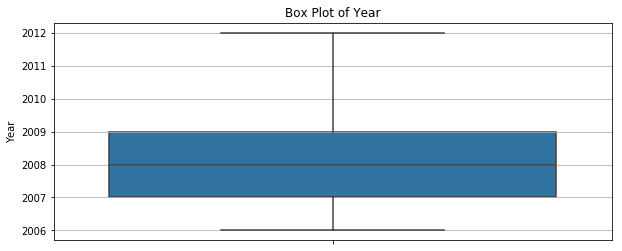

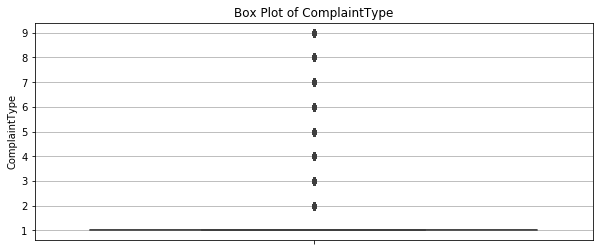

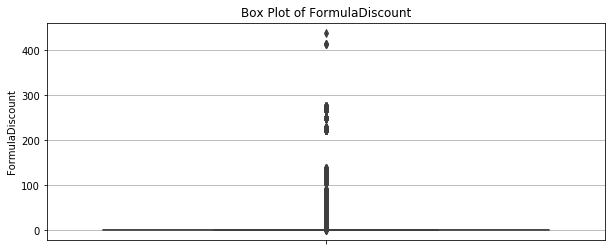

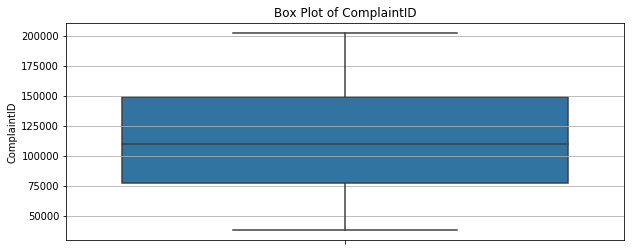

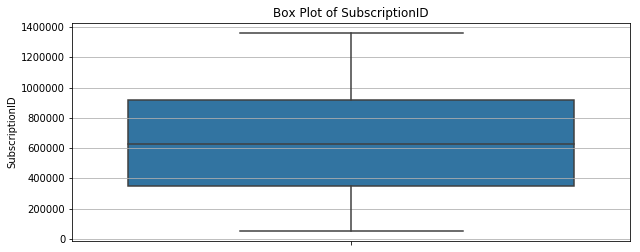

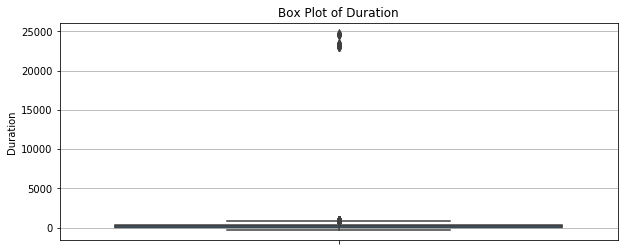

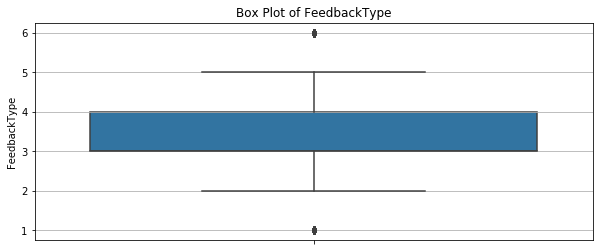

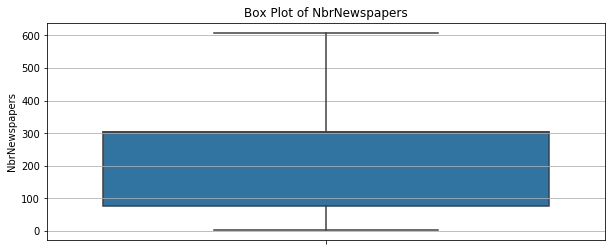

In [14]:
bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = base_table)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

### Box Plot Renewed Account Split

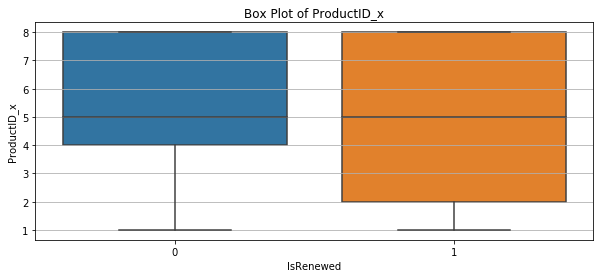

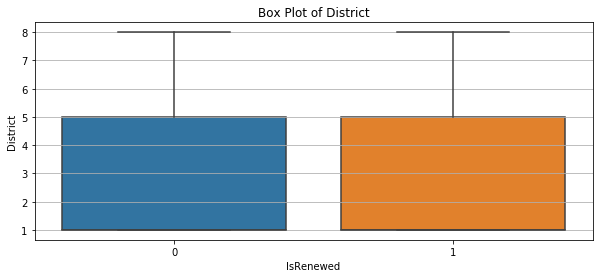

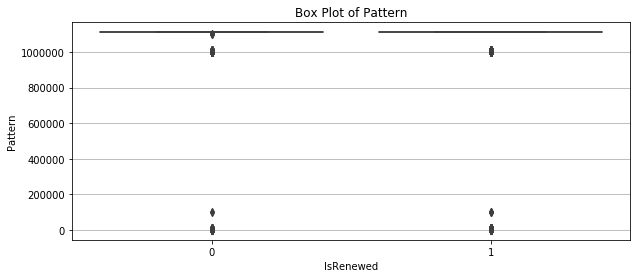

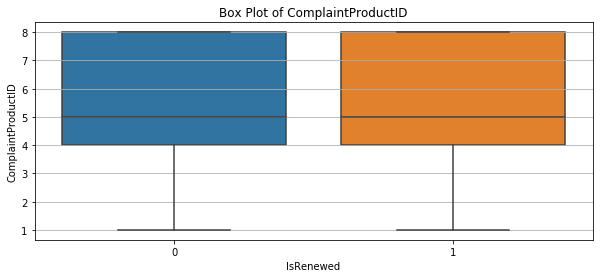

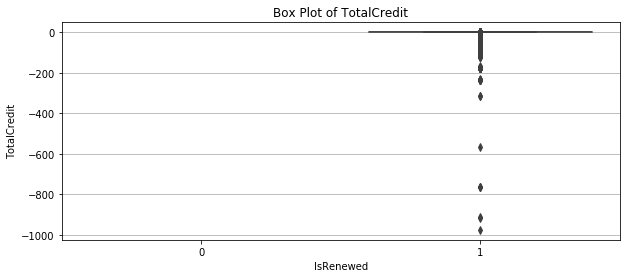

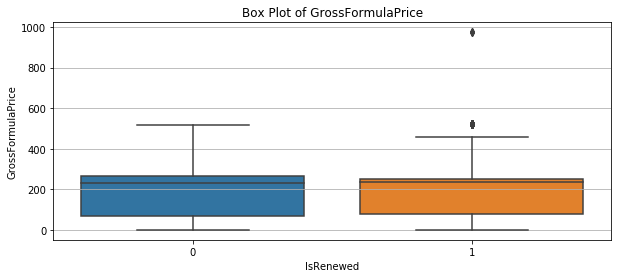

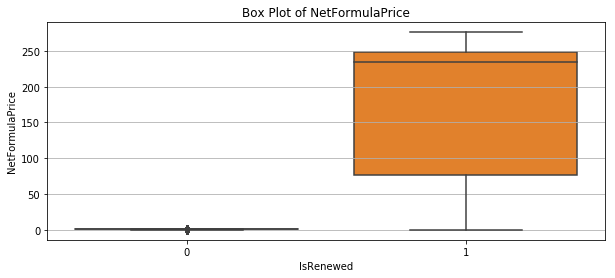

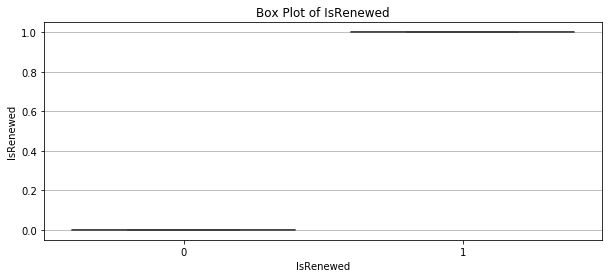

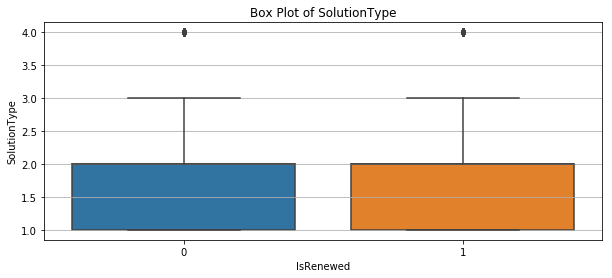

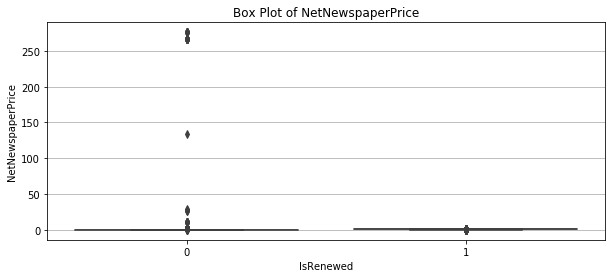

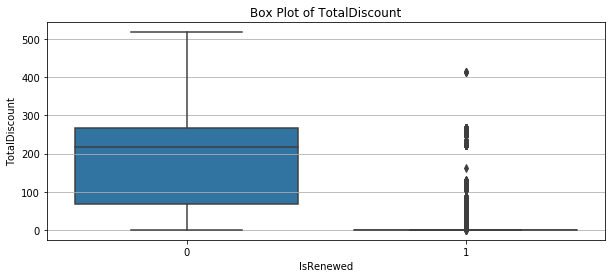

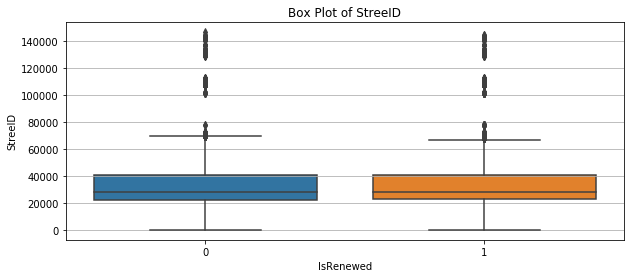

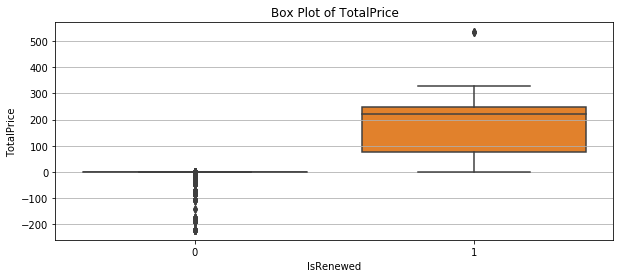

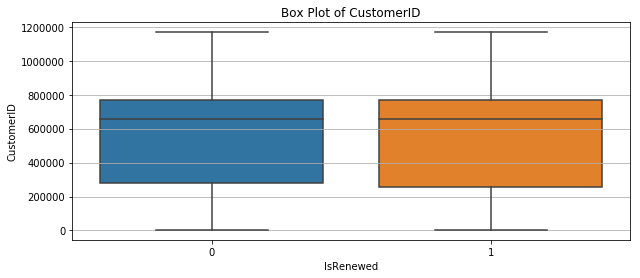

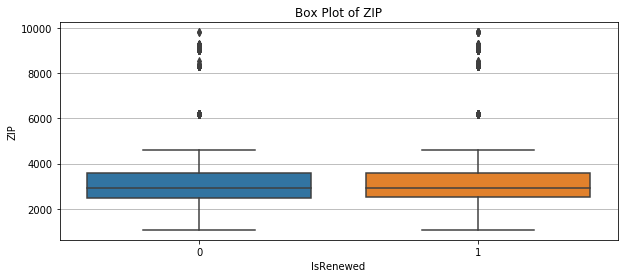

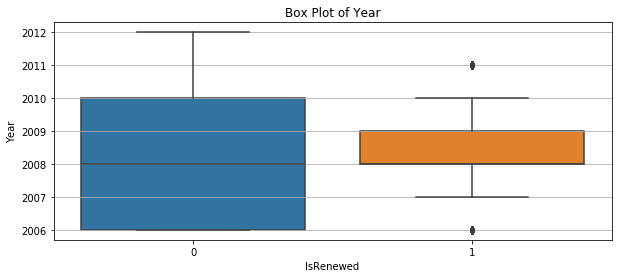

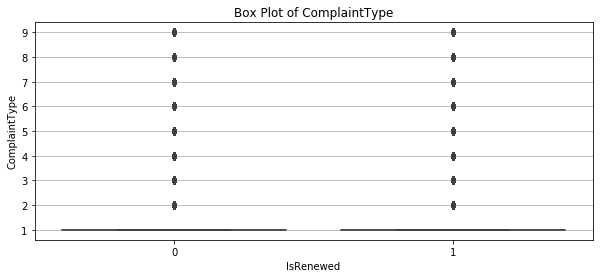

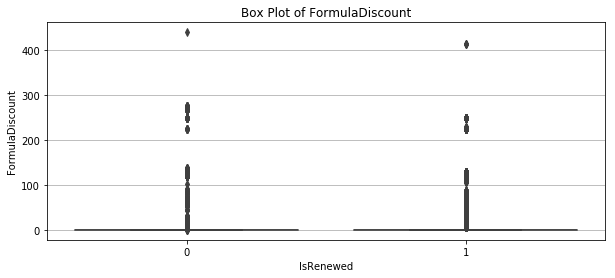

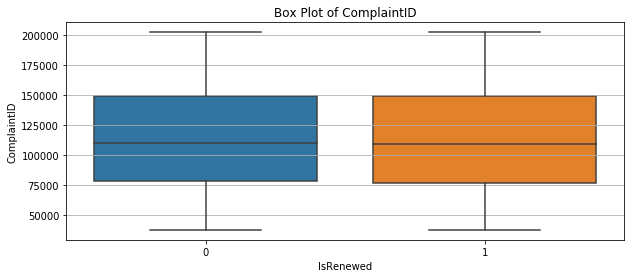

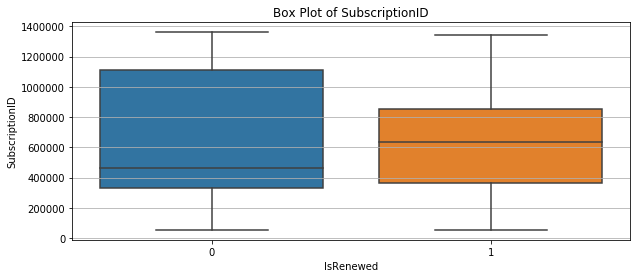

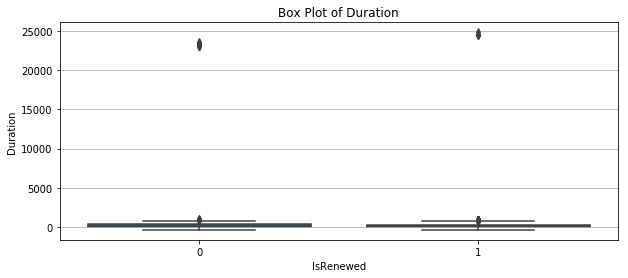

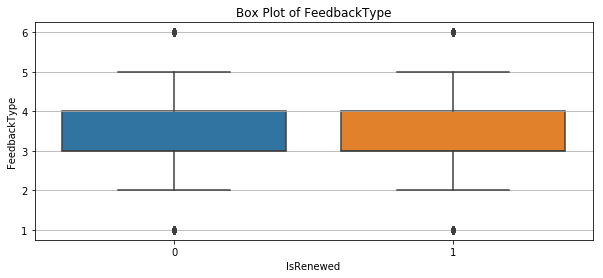

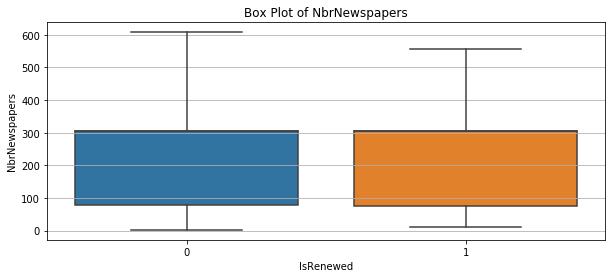

In [13]:
bp = PdfPages('BoxPlots with Renewed Account Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='IsRenewed', y=num_variable, data = base_table)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()



In [3]:
# base_table = pd.read_excel('BaseTable_For_Publishing_Company.xlsx')

In [3]:
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81388 entries, 0 to 81387
Data columns (total 44 columns):
SubscriptionID        81388 non-null int64
CustomerID            81388 non-null int64
ProductID_x           81388 non-null int64
Pattern               81388 non-null int64
StartDate_Sub         81388 non-null datetime64[ns]
EndDate_Sub           81388 non-null datetime64[ns]
NbrNewspapers         81388 non-null int64
NbrStart              81388 non-null object
RenewalDate           60229 non-null object
IsRenewed             81388 non-null int64
PaymentType           60229 non-null object
NewPaymentTYpe        81388 non-null object
PaymentStatus         81388 non-null object
NewPaymentStatus      81388 non-null object
PaymentDate           81011 non-null object
NewPayentDate         59330 non-null object
FormulaID             80479 non-null object
NewFormulaID          81388 non-null object
GrossFormulaPrice     78065 non-null float64
NetFormulaPrice       79875 non-null float64

In [4]:
# base_table.ProductID_x = base_table.ProductID_x.astype('str')
base_table.Pattern = base_table.Pattern.astype('str')

In [5]:
base_table.TotalPrice = base_table.TotalPrice.astype('float64')
base_table.TotalCredit = base_table.TotalCredit.astype('float64')
base_table.TotalDiscount = base_table.TotalDiscount.astype('float64')
base_table.NetFormulaPrice = base_table.NetFormulaPrice.astype('float64')
base_table.NetNewspaperPrice = base_table.NetNewspaperPrice.astype('float64')
base_table.District = base_table.District.astype('str')
base_table.ZIP = base_table.ZIP.astype('str')
base_table.FeedbackType = base_table.FeedbackType.astype('str')
base_table.SolutionType = base_table.SolutionType.astype('str')

In [6]:
base_table.ProductID_x = base_table.ProductID_x.astype('int')

In [7]:
base_table.RenewalDate = pd.to_datetime(base_table.RenewalDate)
base_table.NewPayentDate = pd.to_datetime(base_table.NewPayentDate)
base_table.ComplaintDate = pd.to_datetime(base_table.ComplaintDate)

In [10]:
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81388 entries, 0 to 81387
Data columns (total 44 columns):
SubscriptionID        81388 non-null int64
CustomerID            81388 non-null int64
ProductID_x           81388 non-null int32
Pattern               81388 non-null object
StartDate_Sub         81388 non-null datetime64[ns]
EndDate_Sub           81388 non-null datetime64[ns]
NbrNewspapers         81388 non-null int64
NbrStart              81388 non-null object
RenewalDate           60229 non-null datetime64[ns]
IsRenewed             81388 non-null int64
PaymentType           60229 non-null object
NewPaymentTYpe        81388 non-null object
PaymentStatus         81388 non-null object
NewPaymentStatus      81388 non-null object
PaymentDate           81011 non-null object
NewPayentDate         59330 non-null datetime64[ns]
FormulaID             80479 non-null object
NewFormulaID          81388 non-null object
GrossFormulaPrice     78065 non-null float64
NetFormulaPrice       79875

##### Remove Duplicate Columns

In [8]:
base_table.drop(columns=['PaymentType','PaymentDate','NewPaymentStatus','PaymentDate','FormulaID'],inplace=True)

##### Missing Imputation by `Mean`

In [9]:
def Missing_mean_imputation(x):
    x = x.fillna(x.mean())
    return x

base_table[['GrossFormulaPrice','NetFormulaPrice','NetNewspaperPrice','FormulaDiscount','TotalDiscount','TotalPrice']] = base_table[['GrossFormulaPrice','NetFormulaPrice','NetNewspaperPrice','FormulaDiscount','TotalDiscount','TotalPrice']].apply(lambda x: Missing_mean_imputation(x))

##### Missing Imputation by `Mode`

In [10]:
def Missing_mode_imputation(x):
    x = x.fillna(x.mode()[0])
    return x

base_table[['Gender','DeliveryClass','DeliveryType','FeedbackType','DOB','District','Pattern','ProductID_x','DeliveryContext']] = base_table[['Gender','DeliveryClass','DeliveryType','FeedbackType','DOB','District','Pattern','ProductID_x','DeliveryContext']].apply(lambda x : Missing_mode_imputation(x))

##### Divide the DataFrame into Renewed And not Renewed Accounts

In [10]:
base_table_renew = base_table[base_table.IsRenewed==1]
base_table_notrenew = base_table[base_table.IsRenewed==0]

In [34]:
base_table_renew.head()

,SubscriptionID,CustomerID,ProductID_x,Pattern,StartDate_Sub,EndDate_Sub,NbrNewspapers,NbrStart,RenewalDate,IsRenewed,...,ComplaintType,SolutionType,FeedbackType,DeliveryType,DeliveryClass,DeliveryContext,StartDate_Dlvry,EndDate_Dlvry,Duration,Year
0,1000024,1150045,8,1111110,2010-01-18,2010-04-17,76,25,2010-03-17,1,...,1.0,3.0,nan,MD,NOR,PCH,2010-01-18,2010-04-17,90.0,2010
1,1000024,1150045,8,1111110,2010-01-18,2010-04-17,76,25,2010-03-17,1,...,1.0,1.0,3.0,MD,NOR,PCH,2010-01-18,2010-04-17,90.0,2010
2,1000024,1150045,8,1111110,2010-01-18,2010-04-17,76,25,2010-03-17,1,...,1.0,3.0,6.0,MD,NOR,PCH,2010-01-18,2010-04-17,90.0,2010
3,1000082,1150046,8,1111110,2010-01-14,2010-12-03,50,25,2010-03-03,1,...,NaN,nan,nan,MD,ABN,PCH,2010-12-02,2010-02-13,30.0,2010
4,1000082,1150046,8,1111110,2010-01-14,2010-12-03,50,25,2010-03-03,1,...,NaN,nan,nan,MD,NOR,PCH,2010-01-15,2010-11-02,293.0,2010


In [35]:
base_table_notrenew.head()

,SubscriptionID,CustomerID,ProductID_x,Pattern,StartDate_Sub,EndDate_Sub,NbrNewspapers,NbrStart,RenewalDate,IsRenewed,...,ComplaintType,SolutionType,FeedbackType,DeliveryType,DeliveryClass,DeliveryContext,StartDate_Dlvry,EndDate_Dlvry,Duration,Year
39,1000566,309653,2,1111110,2010-02-13,2010-02-13,304,10,NaT,0,...,NaN,nan,nan,MD,NOR,PCH,NaT,NaT,NaN,2010
48,1000774,110573,8,1111110,2010-02-13,2010-05-15,76,10,NaT,0,...,NaN,nan,nan,MD,NOR,PCH,2010-02-13,2010-05-15,92.0,2010
76,1000848,892534,5,1111110,2010-02-13,2011-12-04,354,10,NaT,0,...,NaN,nan,nan,MD,NOR,PCH,2010-02-13,2011-12-04,660.0,2010
78,1001214,246132,8,1111110,2010-01-16,2010-01-16,152,25,NaT,0,...,NaN,nan,nan,MD,NOR,PCH,NaT,NaT,NaN,2010
111,100131,89154,8,1111110,2006-08-05,2007-07-05,303,15,NaT,0,...,7.0,2.0,nan,MD,NOR,PCH,2006-08-05,2007-07-05,335.0,2006


##### Describe Renewed Accounts Table

In [36]:
base_table_renew.describe()

,SubscriptionID,CustomerID,ProductID_x,NbrNewspapers,IsRenewed,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit,StreeID,ComplaintID,ComplaintProductID,ComplaintType,Duration,Year
count,6.022900e+04,6.022900e+04,60229.000000,60229.000000,60229.0,60229.000000,60229.000000,60229.000000,60229.000000,60229.000000,60229.000000,60141.000000,60229.000000,52117.000000,46321.000000,52117.000000,60229.000000,60229.000000
mean,6.270475e+05,5.416406e+05,4.907735,208.194541,1.0,177.160168,171.315847,0.815111,3.465644,6.049605,165.341966,-3.937312,33210.873782,113893.549187,5.484100,2.311760,186.770476,2008.417822
std,2.980428e+05,3.030884e+05,2.802059,120.184741,0.0,92.857827,94.107852,0.157303,18.268964,24.604198,93.867177,14.906878,20875.658832,44868.101941,2.314511,2.744277,288.316837,0.992939
min,5.382000e+04,3.407000e+03,1.000000,12.000000,1.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,-974.704000,0.000000,37653.000000,1.000000,1.000000,-333.000000,2006.000000
25%,3.651100e+05,2.572940e+05,2.000000,76.000000,1.0,77.000000,77.000000,0.730729,0.000000,0.000000,74.000000,0.000000,22709.000000,76848.000000,4.000000,1.000000,30.000000,2008.000000
50%,6.327570e+05,6.573990e+05,5.000000,304.000000,1.0,235.000000,235.000000,0.819079,0.000000,0.000000,221.840000,0.000000,28440.000000,109517.000000,5.000000,1.000000,164.000000,2008.000000
75%,8.563460e+05,7.683560e+05,8.000000,304.000000,1.0,249.000000,249.000000,0.878289,0.000000,0.000000,249.000000,0.000000,40598.000000,149123.000000,8.000000,1.000000,338.000000,2009.000000
max,1.345120e+06,1.167808e+06,8.000000,558.000000,1.0,973.684000,276.000000,1.120000,413.684000,413.684000,533.840000,0.000000,144662.000000,202605.000000,8.000000,9.000000,24803.000000,2011.000000


In [11]:
renew_num = base_table_renew.select_dtypes(include = ['int64','float64','int32','float32'])
renew_cat = base_table_renew.select_dtypes(include = ['object'])

##### Summary of Data

In [12]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])


Numerical Variables Summary

In [39]:
num_summary=renew_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
SubscriptionID,60229.0,0.0,3.776644e+10,627047.509522,632757.000000,298042.788701,8.882950e+10,53820.000000,75197.44,169312.000,265806.600000,365110.000000,632757.000000,856346.000000,1.028732e+06,1.126482e+06,1239277.00,1345120.000
CustomerID,60229.0,0.0,3.262247e+10,541640.582029,657399.000000,303088.446499,9.186261e+10,3407.000000,7182.00,52417.000,88715.000000,257294.000000,657399.000000,768356.000000,9.038350e+05,9.785380e+05,1122992.00,1167808.000
ProductID_x,60229.0,0.0,2.955880e+05,4.907735,5.000000,2.802059,7.851536e+00,1.000000,1.00,1.000,1.000000,2.000000,5.000000,8.000000,8.000000e+00,8.000000e+00,8.00,8.000
NbrNewspapers,60229.0,0.0,1.253935e+07,208.194541,304.000000,120.184741,1.444437e+04,12.000000,13.00,25.000,25.000000,76.000000,304.000000,304.000000,3.050000e+02,3.060000e+02,329.00,558.000
IsRenewed,60229.0,0.0,6.022900e+04,1.000000,1.000000,0.000000,0.000000e+00,1.000000,1.00,1.000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.00,1.000
GrossFormulaPrice,60229.0,0.0,1.067018e+07,177.160168,235.000000,92.857827,8.622576e+03,0.076923,14.30,26.000,26.000000,77.000000,235.000000,249.000000,2.590000e+02,2.590000e+02,269.48,973.684
NetFormulaPrice,60229.0,0.0,1.031818e+07,171.315847,235.000000,94.107852,8.856288e+03,0.000000,14.30,26.000,26.000000,77.000000,235.000000,249.000000,2.590000e+02,2.590000e+02,267.00,276.000
NetNewspaperPrice,60229.0,0.0,4.909330e+04,0.815111,0.819079,0.157303,2.474438e-02,0.000000,0.00,0.592,0.703072,0.730729,0.819079,0.878289,1.040000e+00,1.040000e+00,1.10,1.120
FormulaDiscount,60229.0,0.0,2.087323e+05,3.465644,0.000000,18.268964,3.337550e+02,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,3.513657e+00,2.048000e+01,112.05,413.684
TotalDiscount,60229.0,0.0,3.643617e+05,6.049605,0.000000,24.604198,6.053666e+02,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,1.933000e+01,4.557322e+01,116.55,413.684


Categorical Variables Summary

In [40]:
cat_summary = renew_cat.apply(lambda x:cat_summary(x)).T
cat_summary

,N,NMISS,ColumnsNames
Pattern,60229,0,1111110 58934 10 868 1000000 ...
NbrStart,60229,0,10 41508 25 16853 4 1087 0 42...
NewPaymentTYpe,60229,0,"BT 52172 DD 8057 Name: NewPaymentTYpe, ..."
PaymentStatus,60229,0,Paid 59871 Not 358 Name: PaymentStatu...
NewFormulaID,60229,0,896 8596 895 6137 4924 5431 924 ...
ProductDiscount,60228,1,0 59795 13.91 120 249 ...
Gender,60229,0,"M 49038 F 11191 Name: Gender, dtype: int64"
DOB,60229,0,01/01/1900 11355 29/05/1956 1066 31/03/...
District,60229,0,1 35412 5 18680 2 2437 7 2278 4 ...
ZIP,60229,0,2900 3010 2650 2244 3500 2219 3740 ...


In [55]:
import pandas_profiling

C:\Users\Walatima\Anaconda2\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Walatima\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\Walatima\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Walatima\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io

In [56]:
pandas_profiling.ProfileReport(base_table_renew)

Number of variables,40
Number of observations,21159
Total Missing (%),0.0%
Total size in memory,6.4 MiB
Average record size in memory,316.0 B
Numeric,15
Categorical,16
Boolean,0
Date,5
Text (Unique),0
Rejected,4


In [22]:
renew_num.corr()

,SubscriptionID,CustomerID,ProductID_x,NbrNewspapers,IsRenewed,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit,StreeID,ComplaintID,ComplaintProductID,ComplaintType,Duration,Year
SubscriptionID,1.000000,0.111837,-0.173246,0.180719,NaN,0.299943,0.187005,0.040646,0.118142,0.150245,0.172157,NaN,-0.021428,0.052439,-0.020383,0.013847,0.037975,0.953643
CustomerID,0.111837,1.000000,-0.351943,0.005443,NaN,-0.027944,0.017716,-0.040188,0.083163,-0.089589,-0.007513,NaN,-0.115425,-0.029800,-0.339706,0.021913,0.003248,0.031912
ProductID_x,-0.173246,-0.351943,1.000000,-0.166017,NaN,-0.162144,0.009591,0.033803,0.001797,-0.138040,0.012279,NaN,0.343910,-0.002544,0.848030,-0.005824,0.008635,-0.114104
NbrNewspapers,0.180719,0.005443,-0.166017,1.000000,NaN,0.952420,-0.189436,0.022579,0.027188,0.776928,-0.107381,NaN,-0.072305,-0.013469,-0.101179,-0.007756,0.112501,0.089575
IsRenewed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrossFormulaPrice,0.299943,-0.027944,-0.162144,0.952420,NaN,1.000000,-0.133917,0.032579,-0.078305,0.797072,-0.046088,NaN,-0.073056,-0.010187,-0.066356,-0.011218,0.111968,0.220951
NetFormulaPrice,0.187005,0.017716,0.009591,-0.189436,NaN,-0.133917,1.000000,-0.002318,-0.021798,-0.299685,0.669909,NaN,0.054554,0.033479,0.045026,-0.030070,-0.021105,0.213576
NetNewspaperPrice,0.040646,-0.040188,0.033803,0.022579,NaN,0.032579,-0.002318,1.000000,0.501211,-0.067354,0.010578,NaN,0.016444,-0.007552,0.042632,-0.008253,-0.003686,0.043549
FormulaDiscount,0.118142,0.083163,0.001797,0.027188,NaN,-0.078305,-0.021798,0.501211,1.000000,-0.103515,0.023033,NaN,0.040287,0.023700,-0.002882,-0.009603,-0.009792,0.130153
TotalDiscount,0.150245,-0.089589,-0.138040,0.776928,NaN,0.797072,-0.299685,-0.067354,-0.103515,1.000000,-0.172534,NaN,-0.103308,-0.048948,-0.055548,-0.001232,0.068576,0.066204


In [12]:
renew_num.drop(columns=['TotalCredit'],inplace=True)

C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Correlation

In [23]:
renew_num.corr()

,SubscriptionID,CustomerID,ProductID_x,NbrNewspapers,IsRenewed,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit,StreeID,ComplaintID,ComplaintProductID,ComplaintType,Duration,Year
SubscriptionID,1.000000,0.111837,-0.173246,0.180719,NaN,0.299943,0.187005,0.040646,0.118142,0.150245,0.172157,NaN,-0.021428,0.052439,-0.020383,0.013847,0.037975,0.953643
CustomerID,0.111837,1.000000,-0.351943,0.005443,NaN,-0.027944,0.017716,-0.040188,0.083163,-0.089589,-0.007513,NaN,-0.115425,-0.029800,-0.339706,0.021913,0.003248,0.031912
ProductID_x,-0.173246,-0.351943,1.000000,-0.166017,NaN,-0.162144,0.009591,0.033803,0.001797,-0.138040,0.012279,NaN,0.343910,-0.002544,0.848030,-0.005824,0.008635,-0.114104
NbrNewspapers,0.180719,0.005443,-0.166017,1.000000,NaN,0.952420,-0.189436,0.022579,0.027188,0.776928,-0.107381,NaN,-0.072305,-0.013469,-0.101179,-0.007756,0.112501,0.089575
IsRenewed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrossFormulaPrice,0.299943,-0.027944,-0.162144,0.952420,NaN,1.000000,-0.133917,0.032579,-0.078305,0.797072,-0.046088,NaN,-0.073056,-0.010187,-0.066356,-0.011218,0.111968,0.220951
NetFormulaPrice,0.187005,0.017716,0.009591,-0.189436,NaN,-0.133917,1.000000,-0.002318,-0.021798,-0.299685,0.669909,NaN,0.054554,0.033479,0.045026,-0.030070,-0.021105,0.213576
NetNewspaperPrice,0.040646,-0.040188,0.033803,0.022579,NaN,0.032579,-0.002318,1.000000,0.501211,-0.067354,0.010578,NaN,0.016444,-0.007552,0.042632,-0.008253,-0.003686,0.043549
FormulaDiscount,0.118142,0.083163,0.001797,0.027188,NaN,-0.078305,-0.021798,0.501211,1.000000,-0.103515,0.023033,NaN,0.040287,0.023700,-0.002882,-0.009603,-0.009792,0.130153
TotalDiscount,0.150245,-0.089589,-0.138040,0.776928,NaN,0.797072,-0.299685,-0.067354,-0.103515,1.000000,-0.172534,NaN,-0.103308,-0.048948,-0.055548,-0.001232,0.068576,0.066204


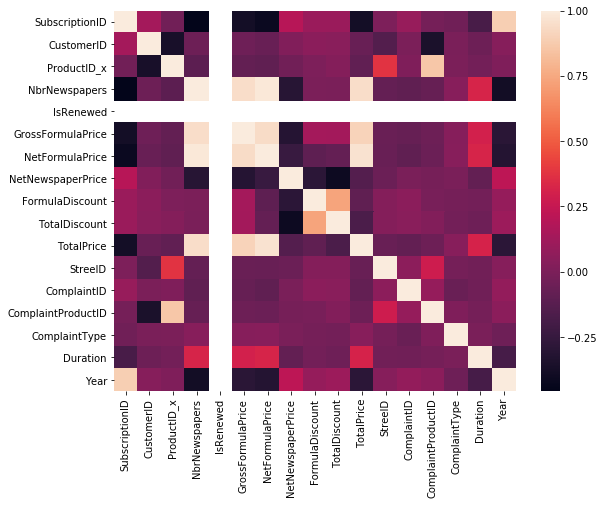

In [91]:
sns.heatmap(renew_num.corr())

In [13]:
renew_num['RenewalDate'] = base_table.RenewalDate

C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### T-test for Numerical Variables

In [44]:
tstats_df = pd.DataFrame()
for num_variable in renew_num.columns:
    tstats = stats.ttest_ind(base_table[base_table['IsRenewed']==1][num_variable],base_table[base_table['IsRenewed']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\stats.py:3842: RuntimeWarning: invalid value encountered in absolute
  prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


         Variable Name T-Statistic       P-Value
0       SubscriptionID    -31.2722  2.06518e-213
1           CustomerID     -7.1295   1.01568e-12
2          ProductID_x    -18.7791   1.64074e-78
3        NbrNewspapers    -16.3909   2.77799e-60
4            IsRenewed         inf             0
5    GrossFormulaPrice    -9.78575   1.33411e-22
6      NetFormulaPrice     244.141             0
7    NetNewspaperPrice     7.43841   1.02899e-13
8      FormulaDiscount    -1.21365      0.224887
9        TotalDiscount    -337.457             0
10          TotalPrice     250.313             0
11         TotalCredit         NaN           NaN
12             StreeID    -1.59522      0.110667
13         ComplaintID         NaN           NaN
14  ComplaintProductID         NaN           NaN
15       ComplaintType         NaN           NaN
16            Duration         NaN           NaN
17                Year     20.4104    2.3074e-92


Drop Variables Based on T-test values

In [11]:
base_table.drop(columns=['TotalDiscount','TotalPrice','ComplaintID','ComplaintType','ComplaintProductID'],inplace=True)

In [12]:
base_table.drop(columns = ['StreeID','FormulaDiscount'],inplace=True)

In [15]:
renew_cat['RenewalDate'] = base_table['RenewalDate']

C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
renew_cat['IsRenewed'] = base_table['IsRenewed']

C:\Users\Walatima\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Chi-Square test for Categorical Variables

In [48]:
chisq_df = pd.DataFrame()
for cat_variable in renew_cat.columns:
    cross_tab = pd.crosstab(base_table[cat_variable],base_table['IsRenewed'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

(           Variable  ChiSquare       P-Value
0           Pattern    604.595  1.45698e-122
1          NbrStart    20862.3             0
2    NewPaymentTYpe     141.63   1.17157e-32
3     PaymentStatus      71733             0
4      NewFormulaID    77958.3             0
5   ProductDiscount    5653.56             0
6            Gender  0.0820115       0.77459
7               DOB    6361.86             0
8          District    98.7423   1.96146e-18
9               ZIP    1464.15  3.56231e-184
10     SolutionType    58.6561   5.55688e-12
11     FeedbackType    13.4505     0.0364142
12     DeliveryType    120.435   7.04647e-27
13    DeliveryClass    410.174   3.35861e-91
14  DeliveryContext    1956.09             0
15        IsRenewed    81382.8             0, '\n')


Drop variables based on Chi-Square Test

In [13]:
base_table.drop(columns=['NbrStart','PaymentStatus','NewFormulaID'],inplace=True)

In [14]:
base_table.drop(columns=['ProductDiscount','DOB','DeliveryContext'],inplace=True)

In [15]:
base_table.drop(columns=['FeedbackType','Gender','SolutionType'],inplace = True)

In [17]:
base_table.columns

Index([u'SubscriptionID', u'CustomerID', u'ProductID_x', u'Pattern',
       u'StartDate_Sub', u'EndDate_Sub', u'NbrNewspapers', u'RenewalDate',
       u'IsRenewed', u'NewPaymentTYpe', u'NewPayentDate', u'NewFormulaID',
       u'GrossFormulaPrice', u'NetFormulaPrice', u'NetNewspaperPrice',
       u'TotalCredit', u'District', u'ZIP', u'ComplaintDate', u'DeliveryType',
       u'DeliveryClass', u'StartDate_Dlvry', u'EndDate_Dlvry', u'Duration',
       u'Year'],
      dtype='object')

#### Make Dummy Variables for Cat Vauriables

In [16]:
base_table_renew = base_table

In [17]:
base_table_renew = pd.get_dummies(data=base_table_renew,columns=['Pattern'])

In [18]:
base_table_renew = pd.get_dummies(data = base_table_renew,columns=['DeliveryClass'])
base_table_renew = pd.get_dummies(data = base_table_renew,columns=['NewPaymentTYpe'])
base_table_renew = pd.get_dummies(data = base_table_renew,columns=['District'])
base_table_renew = pd.get_dummies(data = base_table_renew,columns=['DeliveryType'])

In [19]:
base_table_renew.ZIP = base_table_renew.ZIP.astype('int')

In [65]:
# base_table_renew = pd.get_dummies(data = base_table_renew,columns=['District'])
# base_table_renew = pd.get_dummies(data = base_table_renew,columns=['ZIP'])

In [23]:
base_table_renew.columns

Index([   u'SubscriptionID',        u'CustomerID',       u'ProductID_x',
           u'StartDate_Sub',       u'EndDate_Sub',     u'NbrNewspapers',
             u'RenewalDate',         u'IsRenewed',     u'NewPayentDate',
            u'NewFormulaID', u'GrossFormulaPrice',   u'NetFormulaPrice',
       u'NetNewspaperPrice',       u'TotalCredit',               u'ZIP',
           u'ComplaintDate',   u'StartDate_Dlvry',     u'EndDate_Dlvry',
                u'Duration',              u'Year',        u'Pattern_10',
             u'Pattern_100',     u'Pattern_10000',   u'Pattern_1000000',
         u'Pattern_1000010',    u'Pattern_100010',     u'Pattern_10010',
         u'Pattern_1010000',   u'Pattern_1010010',       u'Pattern_110',
         u'Pattern_1100010',   u'Pattern_1111110', u'DeliveryClass_ABN',
       u'DeliveryClass_NOR', u'NewPaymentTYpe_BT', u'NewPaymentTYpe_DD',
              u'District_1',        u'District_2',        u'District_3',
              u'District_4',        u'District_5', 

In [20]:
base_table_before_analysis = base_table_renew
# base_table_before_analysis.to_excel('Before_Analysis.xlsx')

In [97]:
# base_table_before_analysis = pd.read_excel('Before_Analysis.xlsx')

In [26]:
base_table_before_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81388 entries, 0 to 81387
Data columns (total 47 columns):
SubscriptionID       81388 non-null int64
CustomerID           81388 non-null int64
ProductID_x          81388 non-null int32
StartDate_Sub        81388 non-null datetime64[ns]
EndDate_Sub          81388 non-null datetime64[ns]
NbrNewspapers        81388 non-null int64
RenewalDate          60229 non-null datetime64[ns]
IsRenewed            81388 non-null int64
NewPayentDate        59330 non-null datetime64[ns]
NewFormulaID         81388 non-null object
GrossFormulaPrice    81388 non-null float64
NetFormulaPrice      81388 non-null float64
NetNewspaperPrice    81388 non-null float64
TotalCredit          60141 non-null float64
ZIP                  81388 non-null int32
ComplaintDate        70136 non-null datetime64[ns]
StartDate_Dlvry      80474 non-null datetime64[ns]
EndDate_Dlvry        80474 non-null datetime64[ns]
Duration             80474 non-null float64
Year               

In [21]:
base_table_before_analysis['Duration'] = base_table_before_analysis['Duration'].fillna(0)

In [22]:
base_table_before_analysis.Duration = base_table_before_analysis.Duration.astype('int')

In [23]:
base_table_before_analysis.TotalCredit = base_table_before_analysis.TotalCredit.fillna(base_table_before_analysis.TotalCredit.mean(),inplace=True)

In [24]:
base_table_before_analysis.drop(columns=['TotalCredit'],inplace=True)

In [25]:
base_table_before_analysis.ZIP = base_table_before_analysis.ZIP.astype('int')

In [35]:
base_table_before_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81388 entries, 0 to 81387
Data columns (total 45 columns):
SubscriptionID       81388 non-null int64
CustomerID           81388 non-null int64
ProductID_x          81388 non-null int32
StartDate_Sub        81388 non-null datetime64[ns]
EndDate_Sub          81388 non-null datetime64[ns]
NbrNewspapers        81388 non-null int64
RenewalDate          60229 non-null datetime64[ns]
IsRenewed            81388 non-null int64
NewPayentDate        59330 non-null datetime64[ns]
GrossFormulaPrice    81388 non-null float64
NetFormulaPrice      81388 non-null float64
NetNewspaperPrice    81388 non-null float64
ZIP                  81388 non-null int32
ComplaintDate        70136 non-null datetime64[ns]
StartDate_Dlvry      80474 non-null datetime64[ns]
EndDate_Dlvry        80474 non-null datetime64[ns]
Duration             81388 non-null int32
Year                 81388 non-null int64
Pattern_10           81388 non-null uint8
Pattern_100          813

In [26]:
base_table_before_analysis_2 = base_table_before_analysis.drop(columns=['StartDate_Sub','EndDate_Sub','RenewalDate','NewPayentDate','ComplaintDate','StartDate_Dlvry','EndDate_Dlvry'])

In [27]:
base_table_renew.drop(columns=['StartDate_Sub','EndDate_Sub','RenewalDate','NewPayentDate','ComplaintDate','StartDate_Dlvry','EndDate_Dlvry'],inplace=True)

In [38]:
base_table_before_analysis_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81388 entries, 0 to 81387
Data columns (total 38 columns):
SubscriptionID       81388 non-null int64
CustomerID           81388 non-null int64
ProductID_x          81388 non-null int32
NbrNewspapers        81388 non-null int64
IsRenewed            81388 non-null int64
GrossFormulaPrice    81388 non-null float64
NetFormulaPrice      81388 non-null float64
NetNewspaperPrice    81388 non-null float64
ZIP                  81388 non-null int32
Duration             81388 non-null int32
Year                 81388 non-null int64
Pattern_10           81388 non-null uint8
Pattern_100          81388 non-null uint8
Pattern_10000        81388 non-null uint8
Pattern_1000000      81388 non-null uint8
Pattern_1000010      81388 non-null uint8
Pattern_100010       81388 non-null uint8
Pattern_10010        81388 non-null uint8
Pattern_1010000      81388 non-null uint8
Pattern_1010010      81388 non-null uint8
Pattern_110          81388 non-null uint8
Pat

- ### Applying Logistic Regression

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
import scipy.stats as stats

C:\Users\Walatima\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
X_train,X_test,y_train,y_test = train_test_split(base_table_before_analysis_2,base_table_before_analysis_2['IsRenewed'], test_size = 0.3,random_state = 42)

In [30]:
classifier = LogisticRegression()

##### Train

In [31]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Test `(Accuracy  = 95%)`

In [32]:
classifier.score(X_test,y_test)

0.95146823934144242

### Building Logistic Model

In [67]:
train_features = base_table_before_analysis_2.columns.difference(['IsRenewed'])
train_X, test_X = train_test_split(base_table_before_analysis_2, test_size=0.3, random_state=42)
train_X.columns

Index([   u'SubscriptionID',        u'CustomerID',       u'ProductID_x',
           u'NbrNewspapers',         u'IsRenewed', u'GrossFormulaPrice',
         u'NetFormulaPrice', u'NetNewspaperPrice',               u'ZIP',
                u'Duration',              u'Year',        u'Pattern_10',
             u'Pattern_100',     u'Pattern_10000',   u'Pattern_1000000',
         u'Pattern_1000010',    u'Pattern_100010',     u'Pattern_10010',
         u'Pattern_1010000',   u'Pattern_1010010',       u'Pattern_110',
         u'Pattern_1100010',   u'Pattern_1111110', u'DeliveryClass_ABN',
       u'DeliveryClass_NOR', u'NewPaymentTYpe_BT', u'NewPaymentTYpe_DD',
              u'District_1',        u'District_2',        u'District_3',
              u'District_4',        u'District_5',        u'District_6',
              u'District_7',        u'District_8',   u'DeliveryType_DI',
         u'DeliveryType_DR',   u'DeliveryType_MD'],
      dtype='object')

In [69]:
logreg = sm.logit(formula='IsRenewed ~ ' + "+".join(train_features), data=train_X)
result = logreg.fit()
summ = result.summary()
summ

         Current function value: 0.143564
         Iterations: 35


C:\Users\Walatima\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Walatima\Anaconda2\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Walatima\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              IsRenewed   No. Observations:                56971
Model:                          Logit   Df Residuals:                    56938
Method:                           MLE   Df Model:                           32
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  0.7497
Time:                        14:03:13   Log-Likelihood:                -8179.0
converged:                      False   LL-Null:                       -32673.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           389.3140        nan        nan        nan         nan         nan
CustomerID        -1.163e-07   7.57e-08     -1.535      0.125   -2.65e-07    3.22e-08
DeliveryClass_ABN  -315.8291        nan        nan        nan         nan         nan
DeliveryClass_NOR  -317.8096   4.49e+05     -0.001      0.999   -8.79e+05    8.79e+05
DeliveryType_DI   -1013.0343        nan        nan        nan         nan         nan
DeliveryType_DR   -1013.4272        nan        nan        nan         nan         nan
DeliveryType_MD   -1013.9288        nan        nan        nan         nan         nan
District_1          -63.5675        nan        nan        nan         nan         nan
District_2          -62.4837        nan        nan        nan         nan         nan
District_3          -64.9774        nan        nan        nan         nan         nan
District_4          -63.5444        nan        nan        nan         nan         nan
District_5          -63.1103        nan        nan        nan         nan         nan
District_6          -61.8627        nan        nan        nan         nan         nan
District_7          -63.2203        nan        nan        nan         nan         nan
District_8          -63.0798        nan        nan        nan         nan         nan
Duration           2.241e-05   4.11e-05      0.546      0.585   -5.81e-05       0.000
GrossFormulaPrice     0.0014      0.001      2.603      0.009       0.000       0.002
NbrNewspapers        -0.0254      0.001    -45.298      0.000      -0.027      -0.024
NetFormulaPrice       0.0529      0.001     76.430      0.000       0.052       0.054
NetNewspaperPrice     0.0211      0.002     10.256      0.000       0.017       0.025
NewPaymentTYpe_BT  -256.7645        nan        nan        nan         nan         nan
NewPaymentTYpe_DD  -256.0235        nan        nan        nan         nan         nan
Pattern_10          -45.6509   6.48e+05  -7.04e-05      1.000   -1.27e+06    1.27e+06
Pattern_100         -57.6509   6.48e+05   -8.9e-05      1.000   -1.27e+06    1.27e+06
Pattern_10000       -18.7911   6.83e+05  -2.75e-05      1.000   -1.34e+06    1.34e+06
Pattern_1000000     -45.5244   6.48e+05  -7.02e-05      1.000   -1.27e+06    1.27e+06
Pattern_1000010     -42.9969   6.48e+05  -6.63e-05      1.000   -1.27e+06    1.27e+06
Pattern_100010      -43.8613   6.48e+05  -6.77e-05      1.000   -1.27e+06    1.27e+06
Pattern_10010       -44.5274   6.48e+05  -6.87e-05      1.000   -1.27e+06    1.27e+06
Pattern_1010000     -44.3124   6.48e+05  -6.84e-05      1.000   -1.27e+06    1.27e+06
Pattern_1010010     -21.3621   6.51e+05  -3.28e-05      1.000   -1.28e+06    1.28e+06
Pattern_110         -44.1852   6.48e+05  -6.82e-05      1.000   -1.27e+06    1.27e+06
Pattern_1100010     -58.3099   6.48e+05     -9e-05      1.000   -1.27e+06    1.27e+06
Pattern_1111110     -45.6110   6.48e+05  -7.04e-05      1.000   -1.27e+06    1.27e+06
ProductID_x          -0.1663      0.015    -11.190      0.0

In [71]:
train_gini = 2*metrics.roc_auc_score(train_X['IsRenewed'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['IsRenewed'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

('The Gini Index for the model built on the Train Data is : ', 0.94304447789297896)
('The Gini Index for the model built on the Test Data is : ', 0.93899068145300513)


##### Train Case Prediction

In [73]:
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['IsRenewed']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
8440,1,0.998751
73947,1,0.743297
81306,1,0.940787
19556,1,0.999398
73214,1,0.905647


##### Test Case Prediction

In [75]:
test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['IsRenewed']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
76993,1,0.745342
30188,1,0.995141
80092,0,0.015394
25955,1,0.999128
39864,0,0.493150


##### Getting the ROC Curve Plots

In [76]:
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [77]:
roc_like_df

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,1.000000,0.653299
0,0.040816,1.000000,0.675541
0,0.061224,1.000000,0.686864
0,0.081633,1.000000,0.699939
0,0.102041,1.000000,0.708432
0,0.122449,1.000000,0.726697
0,0.142857,1.000000,0.741862
0,0.163265,1.000000,0.758711
0,0.183673,1.000000,0.773270


##### Plotting Sensivity And Specificity

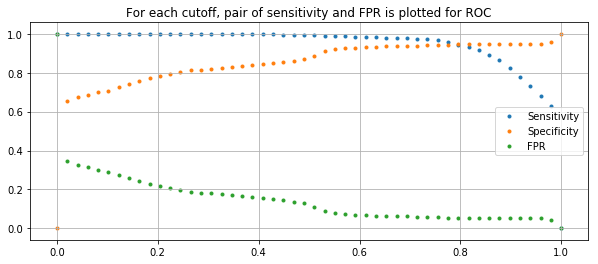

In [78]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='.', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='.', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='.', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

`ROC cutoff = 0.65`

In [79]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.653061,0.980562,0.936982,1.917544


##### Plot Confusion Matrix

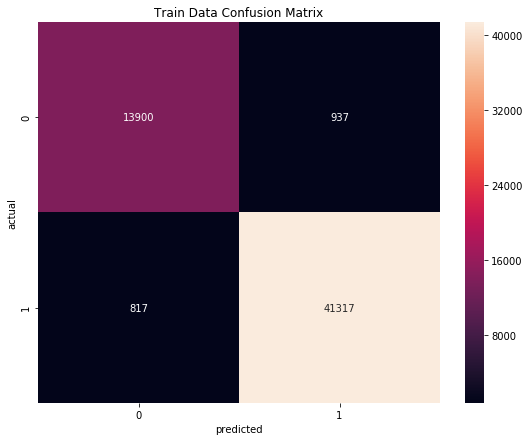

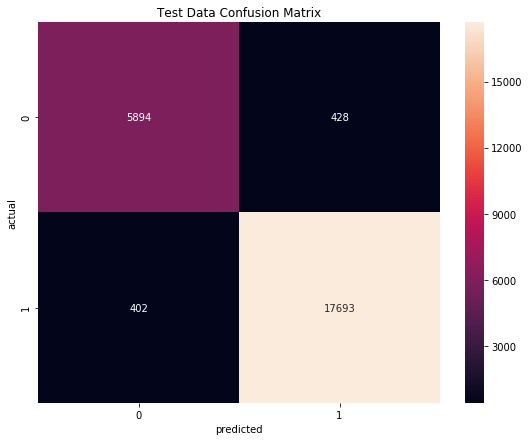

In [80]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.65 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.65 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [81]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

('The overall accuracy score for the Train Data is : ', 0.96921240631198324)
('The overall accuracy score for the Test Data  is : ', 0.96600729000286689)


#### `Train Accuracy  = 0.97` <br>`Test Accuracy = 0.96  `

### Decision Tree Classifier

In [33]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
clf_dt= DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Train

In [35]:
score_train=((accuracy_score(clf_dt.predict(X_train), y_train))*100).round(2)
score_train

100.0

##### Test

In [36]:
score_test=((accuracy_score(clf_dt.predict(X_test), y_test))*100).round(2)
score_test

100.0

##### `Accuracy = 100%` (might be Overfitting)

In [37]:
y_pred = clf_dt.predict(X_test)

Text(0.5,42,'Predicted Label')

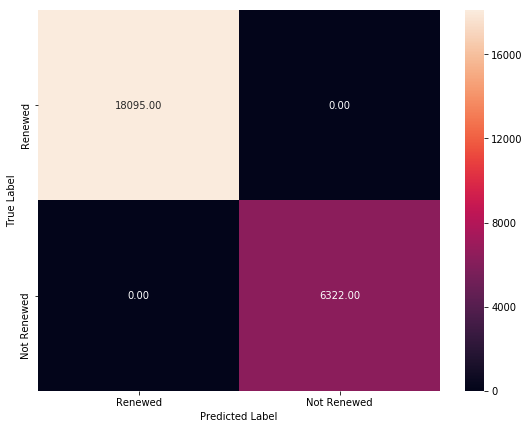

In [38]:
knn_cm = metrics.confusion_matrix(y_pred,y_test,[1,0])
sns.heatmap(knn_cm,annot = True,fmt = '.2f',xticklabels=["Renewed","Not Renewed"],yticklabels=["Renewed","Not Renewed"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### K-Nearest Neighbour Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
clf_knn=KNeighborsClassifier(n_neighbors = 3)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

##### Train

In [125]:
score_train=((accuracy_score(clf_knn.predict(X_train), y_train))*100).round(2)
score_train

97.930000000000007

##### Test

In [127]:
score_val= ((accuracy_score(clf_knn.predict(X_test), y_test))*100).round(2)
score_val

95.780000000000001

##### `Accuracy = 95.7%`

In [135]:
y_pred = clf_knn.predict(X_test)

##### Confusion Matrix Of Knearest Neighbour

Text(0.5,42,'Predicted Label')

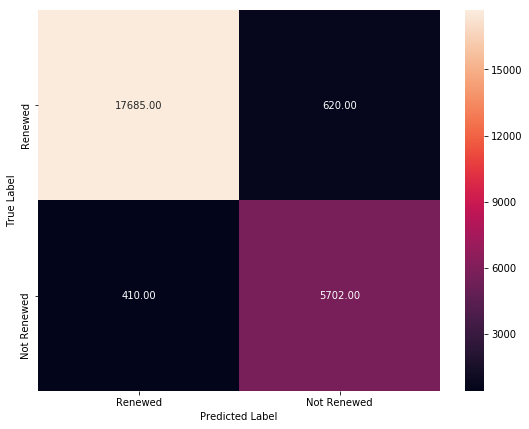

In [136]:
knn_cm = metrics.confusion_matrix(y_pred,y_test,[1,0])
sns.heatmap(knn_cm,annot = True,fmt = '.2f',xticklabels=["Renewed","Not Renewed"],yticklabels=["Renewed","Not Renewed"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Accuracy Of Models Used

- Logistic Regression = 96.6 % <br>
- Decision Tree = 100.0 % <br>
- K-Nearest NeighnourClassifier = 95.7% <br>
##### Best Model  = Logistic Model 